In [696]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import shap
import os
import plotly.graph_objects as go
from shap.plots import waterfall, beeswarm
from shap import Explanation, KernelExplainer
import numpy as np
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.colors as mcolors
from matplotlib import cm
import matplotlib.pyplot as plt
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, r2_score
# from xgboost import XGBClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
# from imblearn.over_sampling import SMOTE

In [697]:

feature_types = {
    "project_feature": ["num_commits", "project_age_days", "num_issues", "num_pull", 
                        "num_stargazers", "num_watchers", "num_forks", "num_subscribers", 
                        "num_contributors", "project_size(kB)"],
    "security_practice": ["ssf0_Binary-Artifacts", "ssf1_Branch-Protection",
                          "ssf3_CII-Best-Practices", "ssf7_Dependency-Update-Tool",
                          "ssf8_Fuzzing", "ssf9_License", "ssf10_Maintained", "ssf13_SAST",
                          "ssf17_Vulnerabilities"],
    "project_quality": ['num_sonarQube_BUG_HIGH', 'num_sonarQube_BUG_MEDIUM', 'num_sonarQube_BUG_LOW', 'num_sonarQube_BUG_BLOCKER',
            'num_sonarQube_VULNERABILITY_HIGH', 'num_sonarQube_VULNERABILITY_MEDIUM', 'num_sonarQube_VULNERABILITY_LOW',
            'num_sonarQube_VULNERABILITY_BLOCKER', 'num_sonarQube_CODE_SMELL_HIGH', 'num_sonarQube_CODE_SMELL_MEDIUM',
            'num_sonarQube_CODE_SMELL_LOW', 'num_sonarQube_CODE_SMELL_BLOCKER'],
}

# Define features and target
# เปลี่ยนฟีเจ้อจรงนี้้ 👇👇👇👇
feature = "project_quality"
# เปลี่ยนcategoryจรงนี้้ 👇👇👇👇
cate = "Generic policy"

# Split the dataset into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X_train = pd.read_csv(f"auto/{cate}_{feature}_X_train.csv")
X_test = pd.read_csv(f"auto/{cate}_{feature}_X_test.csv")
y_train = pd.read_csv(f"auto/{cate}_{feature}_y_train.csv")
y_test = pd.read_csv(f"auto/{cate}_{feature}_y_test.csv")
        
# Train the RandomForestClassifier with given parameters
### Generic policy ###
if feature == "project_feature" and cate == "Generic policy":
    model = RandomForestClassifier(
        max_features=1, min_samples_leaf=6, min_samples_split=7,
        n_estimators=512, n_jobs=1, random_state=1, warm_start=True
    )
elif feature == "security_practice" and cate == "Generic policy":
    model = RandomForestClassifier(
        bootstrap=False, max_features=1, min_samples_leaf=3,
        min_samples_split=14, n_estimators=512, n_jobs=1,
        random_state=1, warm_start=True
    )
elif feature == "project_quality" and cate == "Generic policy":
    model = AdaBoostClassifier(algorithm='SAMME',
                   estimator=DecisionTreeClassifier(max_depth=10),
                   learning_rate=0.010381491760996881, n_estimators=362,
                   random_state=1)
### Reporting mechanism ###
elif feature == "project_feature" and cate == "Reporting mechanism":
    model = ExtraTreesClassifier(bootstrap=True, criterion='entropy', max_features=1,
                     min_samples_split=7, n_estimators=512, n_jobs=1,
                     random_state=1, warm_start=True)
elif feature == "security_practice" and cate == "Reporting mechanism":
    model = HistGradientBoostingClassifier(early_stopping=True,
                               l2_regularization=8.908183652101429e-05,
                               learning_rate=0.19911994270380215,
                               max_iter=512, max_leaf_nodes=955,
                               min_samples_leaf=33, n_iter_no_change=2,
                               random_state=1, validation_fraction=None,
                               warm_start=True)
elif feature == "project_quality" and cate == "Reporting mechanism":
    model = KNeighborsClassifier(n_neighbors=2, p=1, weights='distance') ####🥶🥶🥶🥶🥶
### Scope of practice ###
elif feature == "project_feature" and cate == "Scope of practice":
    model = RandomForestClassifier(max_features=15, min_samples_leaf=5,
                       min_samples_split=20, n_estimators=512, n_jobs=1,
                       random_state=1, warm_start=True)
elif feature == "security_practice" and cate == "Scope of practice":
    model = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=9),
                   learning_rate=1.9701455892241493, n_estimators=101,
                   random_state=1)
elif feature == "project_quality" and cate == "Scope of practice":
    model = RandomForestClassifier(bootstrap=False, criterion='entropy', max_features=4,
                       min_samples_leaf=7, n_estimators=512, n_jobs=1,
                       random_state=1, warm_start=True)
### User guideline ###
elif feature == "project_feature" and cate == "User guideline":
    model = ExtraTreesClassifier(criterion='entropy', max_features=2, n_estimators=512,
                     n_jobs=1, random_state=1, warm_start=True)
elif feature == "security_practice" and cate == "User guideline":
    model = HistGradientBoostingClassifier(early_stopping=True,
                               l2_regularization=0.1144885415414585,
                               learning_rate=0.35651231429733377, 
                               max_iter=128, max_leaf_nodes=570,
                               min_samples_leaf=52, n_iter_no_change=20,
                               random_state=1,
                               validation_fraction=0.26745137407982933,
                               warm_start=True)
elif feature == "project_quality" and cate == "User guideline":
    model = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=2),
                   learning_rate=0.16884660398877008, n_estimators=144,
                   random_state=1)
else:
    raise ValueError("Invalid feature or category selection.")

print(model)

model.fit(X_train, y_train)

# AUC
# Predict the probabilities for the test set
y_probs = model.predict_proba(X_test)[:, 1]
# Predict the classes for the test set
y_pred = model.predict(X_test)

# Calculate the AUC - ROC score
roc_auc = roc_auc_score(y_test, y_probs) 

# Calculate other metrics
accuracy = accuracy_score(y_test, y_pred)

print(f"AUC - ROC Score: {roc_auc:.2f}")

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_pred, y_test)
print(f"Accuracy: {accuracy}")
print("Classification report:")
print(report)

AdaBoostClassifier(algorithm='SAMME',
                   estimator=DecisionTreeClassifier(max_depth=10),
                   learning_rate=0.010381491760996881, n_estimators=362,
                   random_state=1)


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning:

The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.



AUC - ROC Score: 0.56
Accuracy: 0.5409836065573771
Classification report:
              precision    recall  f1-score   support

           0       0.55      0.62      0.58        63
           1       0.53      0.46      0.49        59

    accuracy                           0.54       122
   macro avg       0.54      0.54      0.54       122
weighted avg       0.54      0.54      0.54       122



how to read graph: https://www.aidancooper.co.uk/a-non-technical-guide-to-interpreting-shap-analyses/

tree explainer: https://medium.com/analytics-vidhya/shap-part-3-tree-shap-3af9bcd7cd9b

shap index 0 or 1: https://github.com/shap/shap/issues/1252

readability shap: https://medium.com/towards-data-science/how-to-easily-customize-shap-plots-in-python-fdff9c0483f2

TreeExplainer (Optimized for Trees)

In [698]:
# 1. TreeExplainer (Optimized for Trees)
# tree_explainer = shap.TreeExplainer(model, X_test)
# shap_values_tree = tree_explainer(X_test)

explainer = shap.TreeExplainer(model)
shap_values_tree = explainer.shap_values(X_test)


AttributeError: 'AdaBoostClassifier' object has no attribute 'base_estimator_'

In [ ]:
print(shap_values_tree)

[[[-1.51310366e-04  1.51310366e-04]
  [ 4.57103486e-02 -4.57103486e-02]
  [ 8.02624247e-03 -8.02624247e-03]
  [-6.17828175e-02  6.17828175e-02]
  [-1.49969005e-03  1.49969005e-03]]

 [[-1.15041755e-03  1.15041755e-03]
  [ 3.23888753e-02 -3.23888753e-02]
  [-4.32563764e-02  4.32563764e-02]
  [-6.93995889e-02  6.93995889e-02]
  [-9.43555562e-03  9.43555562e-03]]

 [[ 1.09180434e-03 -1.09180434e-03]
  [ 1.18871111e-02 -1.18871111e-02]
  [ 1.75114347e-02 -1.75114347e-02]
  [ 2.47646292e-01 -2.47646292e-01]
  [-7.60880071e-02  7.60880071e-02]]

 ...

 [[-1.51310366e-04  1.51310366e-04]
  [ 4.57103486e-02 -4.57103486e-02]
  [ 8.02624247e-03 -8.02624247e-03]
  [-6.17828175e-02  6.17828175e-02]
  [-1.49969005e-03  1.49969005e-03]]

 [[-1.15041755e-03  1.15041755e-03]
  [ 3.23888753e-02 -3.23888753e-02]
  [-4.32563764e-02  4.32563764e-02]
  [-6.93995889e-02  6.93995889e-02]
  [-9.43555562e-03  9.43555562e-03]]

 [[ 1.97052486e-03 -1.97052486e-03]
  [ 3.08857628e-02 -3.08857628e-02]
  [ 1.562527

In [ ]:
# import os
# import pandas as pd
# import numpy as np
# import json

# # Define directory and file path
# directory = "raw_shap"  # Remove leading "/"
# file_path = f"{directory}/{cate}_{feature}_shap.csv"

# # Ensure the directory exists
# os.makedirs(directory, exist_ok=True)

# # Convert SHAP values to a 2D format
# num_samples, num_features, num_classes = shap_values_tree.shape  # Get dimensions
# reshaped_values = shap_values_tree.reshape(num_samples, num_features * num_classes)

# # Create column names dynamically
# columns = [f"Feature_{i}_Class_{j}" for i in range(num_features) for j in range(num_classes)]

# # Convert to DataFrame
# df = pd.DataFrame(reshaped_values, columns=columns)

# # Save to CSV
# df.to_csv(file_path, index=False)

# print(f"SHAP values saved as CSV at {file_path}")


In [ ]:
shap_df = pd.DataFrame(shap_values_tree[:, :, 1], columns=X_test.columns)

# Compute and print raw mean SHAP values
mean_shap_raw = shap_df.abs().mean(0).sort_values(ascending=False)
print(mean_shap_raw)

ssf9_License                   0.083048
ssf7_Dependency-Update-Tool    0.060012
ssf10_Maintained               0.032186
ssf8_Fuzzing                   0.011838
ssf3_CII-Best-Practices        0.007155
dtype: float64


In [ ]:
shap_df = pd.DataFrame(shap_values_tree[:, :, 1], columns=X_test.columns)

# Compute and print raw mean SHAP values
mean_shap_raw = shap_df.mean(0).sort_values(ascending=False)
print(mean_shap_raw)

ssf7_Dependency-Update-Tool    0.009730
ssf10_Maintained               0.006968
ssf3_CII-Best-Practices       -0.001553
ssf8_Fuzzing                  -0.003105
ssf9_License                  -0.007415
dtype: float64


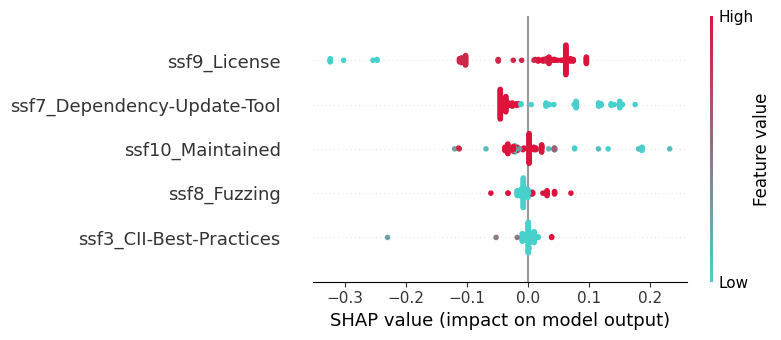

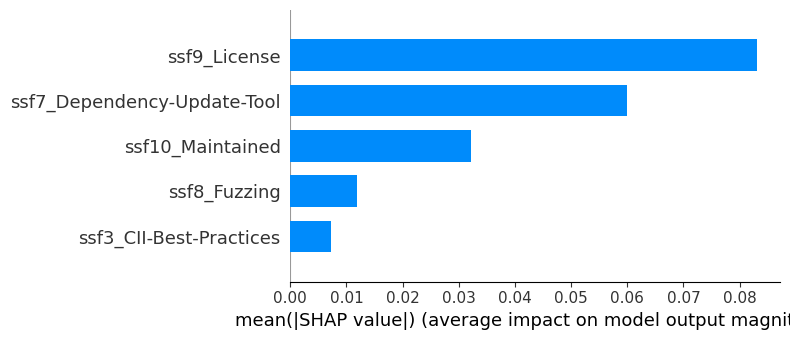

In [ ]:

custom_cmap = mcolors.LinearSegmentedColormap.from_list("pink_skyblue", ["mediumturquoise", "crimson"])

# # Set the file path to save the image
# save_directory = "shap"  # Change this to your desired directory
# os.makedirs(save_directory, exist_ok=True)  # Ensure the directory exists
# save_path = os.path.join(save_directory, f"{cate}_{feature}_summary_plot.png")  # File name

# Create the SHAP summary plot
shap.summary_plot(shap_values_tree[:, :, 1], X_test, cmap=custom_cmap)

# # Save the plot after SHAP generates it
# plt.savefig(save_path, dpi=300, bbox_inches='tight')

# # Show the plot (optional)
# plt.show()

# Generate the bar summary plot
shap.summary_plot(shap_values_tree[:, :, 1], X_test, plot_type="bar", show=True)


In [ ]:
# Get feature names from X_test
feature_names = X_test.columns.tolist()  # Extract actual feature names

# Convert SHAP values to a 2D format
num_samples, num_features, num_classes = shap_values_tree.shape  # Get dimensions
reshaped_values = shap_values_tree.reshape(num_samples, num_features * num_classes)

# Create dynamic column names using real feature names
columns = [f"{feature_names[i]}_Class_{j}" for i in range(num_features) for j in range(num_classes)]

# Convert to DataFrame
df = pd.DataFrame(reshaped_values, columns=columns)

# Display first few rows
print(df.head())

   ssf3_CII-Best-Practices_Class_0  ssf3_CII-Best-Practices_Class_1  \
0                        -0.000151                         0.000151   
1                        -0.001150                         0.001150   
2                         0.001092                        -0.001092   
3                         0.003564                        -0.003564   
4                        -0.009802                         0.009802   

   ssf7_Dependency-Update-Tool_Class_0  ssf7_Dependency-Update-Tool_Class_1  \
0                             0.045710                            -0.045710   
1                             0.032389                            -0.032389   
2                             0.011887                            -0.011887   
3                            -0.029383                             0.029383   
4                            -0.150021                             0.150021   

   ssf8_Fuzzing_Class_0  ssf8_Fuzzing_Class_1  ssf9_License_Class_0  \
0              0.008026    

In [ ]:
# Select only columns corresponding to Class 1
class_1_columns = [col for col in columns if "_Class_1" in col]  # Filter Class 1 columns
df_class_1 = df[class_1_columns]  # Select only Class 1 SHAP values

# Rename columns to remove "_Class_1" suffix for clarity
df_class_1.columns = [col.replace("_Class_1", "") for col in df_class_1.columns]

# Display first few rows
print(df_class_1.head())

   ssf3_CII-Best-Practices  ssf7_Dependency-Update-Tool  ssf8_Fuzzing  \
0                 0.000151                    -0.045710     -0.008026   
1                 0.001150                    -0.032389      0.043256   
2                -0.001092                    -0.011887     -0.017511   
3                -0.003564                     0.029383     -0.018056   
4                 0.009802                     0.150021     -0.000424   

   ssf9_License  ssf10_Maintained  
0      0.061783          0.001500  
1      0.069400          0.009436  
2     -0.247646          0.076088  
3     -0.324443         -0.017865  
4      0.095359          0.022053  


In [ ]:


# Compute absolute mean SHAP values for correct sorting
df_mean = df_class_1.abs().mean(numeric_only=True).reset_index()  
df_mean.columns = ['Feature', 'Mean |SHAP Value|']  # Calculate absolute mean SHAP values
df_mean = df_mean.sort_values(by="Mean |SHAP Value|", ascending=True)  # Sort by absolute impact

# Compute actual mean SHAP values for correct bar direction
df_signed_mean = df_class_1.mean(numeric_only=True).reset_index()
df_signed_mean.columns = ['Feature', 'Mean SHAP Value']

# Merge absolute and signed values while maintaining the correct order
df_final = df_mean.merge(df_signed_mean, on="Feature")

# Re-sort after merging to maintain correct order
df_final = df_final.sort_values(by="Mean |SHAP Value|", ascending=True)

# Assign colors: pink for positive, skyblue for negative values
df_final["Color"] = df_final["Mean SHAP Value"].apply(lambda x: "mediumturquoise" if x >= 0 else "crimson")

# Creating the horizontal bar plot with correct sorting and left/right direction
fig = go.Figure()

fig.add_trace(go.Bar(
    x=df_final["Mean SHAP Value"],  # Use signed values for correct left/right effect
    y=df_final["Feature"],  # Order is already sorted by absolute SHAP values
    orientation='h',
    marker=dict(color=df_final["Color"]),
    text=[f"{v:+.3f}" for v in df_final["Mean SHAP Value"]],  # ✅ Show signed values (+/-) correctly
    textposition="outside"
))

# Updating layout to ensure zero-centered importance plot
fig.update_layout(
    title=f"{cate}:{feature}",
    title_font_size=20,
    xaxis_title="Mean SHAP Value (Average Impact on Model Output)",
    xaxis_title_font_size=18, 
    yaxis_title="Features",
    yaxis_title_font_size=19,
    template="plotly_white",
    font=dict(size=16),  # Increase overall font size
    xaxis=dict(
        tickfont=dict(size=16),  # Increase x-axis tick label font size
        zeroline=True,  # Add a reference line at 0
        zerolinecolor="black",
        zerolinewidth=2,
        range=[-0.1, 0.1]
    ),
    yaxis=dict(
        tickfont=dict(size=16)  # Increase y-axis tick label font size
    ),
    showlegend=False,  # No legend needed
    width=1400,  # Set figure width
    height=500,  # Set figure height
)

# Show the plot
fig.show()

# # Ensure the "shap" directory exists before saving
# directory = "shap"
# os.makedirs(directory, exist_ok=True)  # Create folder if it doesn't exist

# # Define save path
# save_path = f"{directory}/{cate}_{feature}_plot.png"

# # Save the figure as an image
# fig.write_image(save_path)
# print(f"Figure saved successfully at: {save_path}")


In [ ]:
import pandas as pd
import plotly.graph_objects as go

# Compute absolute mean SHAP values for correct sorting
df_mean = df_class_1.abs().mean(numeric_only=True).reset_index()  # Use absolute values for sorting
df_mean.columns = ['Feature', 'Mean |SHAP Value|']
df_mean = df_mean.sort_values(by="Mean |SHaAP Value|", ascending=True)  # Sort by absolute impact

# Compute actual mean SHAP values for correct bar coloring
df_signed_mean = df_class_1.mean(numeric_only=True).reset_index()
df_signed_mean.columns = ['Feature', 'Mean SHAP Value']

# Merge both to get proper ordering and sign information
df_final = df_mean.merge(df_signed_mean, on="Feature")

# Assign colors: red for positive, blue for negative values
df_final["Color"] = df_final["Mean SHAP Value"].apply(lambda x: "mediumturquoise" if x >= 0 else "crimson")

# Creating the horizontal bar plot with correct order
fig = go.Figure()

fig.add_trace(go.Bar(
    x=df_final["Mean |SHAP Value|"],
    y=df_final["Feature"],
    orientation='h',
    marker=dict(color=df_final["Color"]),
    text=[f"{v:.3f}" for v in df_final["Mean |SHAP Value|"]],  # Annotate absolute SHAP values
    textposition="outside"
))

# Updating layout to match SHAP importance plot style
fig.update_layout(

    title=f"{cate}:{feature}",
    title_font_size=20,
    xaxis_title="Mean SHAP Value (Average Impact on Model Output)",
    xaxis_title_font_size=18, 
    yaxis_title="Features",
    yaxis_title_font_size=19,
    template="plotly_white",
    font=dict(size=16),  # Increase overall font size
    xaxis=dict(
        range=[0, 0.1],
        tickfont=dict(size=16),  # Increase x-axis tick label font size
    ),
    yaxis=dict(
        tickfont=dict(size=16)  # Increase y-axis tick label font size
    ),
    showlegend=False,  # No legend needed
    width=1200,  # Set figure width
    height=500,  # Set figure height
)

# Show the plot
fig.show()
# Ensure the "shap" directory exists before saving
directory = "shap"
os.makedirs(directory, exist_ok=True)  # Create folder if it doesn't exist

# Define save path
save_path = f"{directory}/{cate}_{feature}_bar_right_plot.png"

# Save the figure as an image
fig.write_image(save_path)
print(f"Figure saved successfully at: {save_path}")

Figure saved successfully at: shap/Generic policy_security_practice_bar_right_plot.png


In [ ]:
import pandas as pd
import plotly.graph_objects as go

# Compute absolute mean SHAP values for correct sorting
df_mean = df_class_1.abs().mean(numeric_only=True).reset_index()  # Use absolute values for sorting
df_mean.columns = ['Feature', 'Mean |SHAP Value|']
df_mean = df_mean.sort_values(by="Mean |SHAP Value|", ascending=True)  # Sort by absolute impact

# Compute actual mean SHAP values for correct bar coloring
df_signed_mean = df_class_1.mean(numeric_only=True).reset_index()
df_signed_mean.columns = ['Feature', 'Mean SHAP Value']

# Merge both to get proper ordering and sign information
df_final = df_mean.merge(df_signed_mean, on="Feature")

# Assign colors: red for positive, blue for negative values
df_final["Color"] = df_final["Mean SHAP Value"].apply(lambda x: "mediumturquoise" if x >= 0 else "crimson")

# Creating the horizontal bar plot with correct order
fig = go.Figure()

fig.add_trace(go.Bar(
    x=df_final["Mean |SHAP Value|"],
    y=df_final["Feature"],
    orientation='h',
    marker=dict(color=df_final["Color"]),
    text=[f"{v:.3f}" for v in df_final["Mean |SHAP Value|"]],  # Annotate absolute SHAP values
    textposition="outside"
))

# Updating layout to match SHAP importance plot style
fig.update_layout(
    title=f"{cate}:{feature}",
    title_font_size=20,
    xaxis_title="Mean SHAP Value (Average Impact on Model Output)",
    xaxis_title_font_size=18, 
    yaxis_title="Features",
    yaxis_title_font_size=19,
    template="plotly_white",
    font=dict(size=16),  # Increase overall font size
    xaxis=dict(
        range=[0, 0.1],
        tickfont=dict(size=16),  # Increase x-axis tick label font size
        autorange="reversed",
    ),
    yaxis=dict(
        tickfont=dict(size=16)  # Increase y-axis tick label font size
    ),
    showlegend=False,  # No legend needed
    width=1300,  # Set figure width
    height=500,  # Set figure height
)

# Show the plot
fig.show()
# Ensure the "shap" directory exists before saving
directory = "shap"
os.makedirs(directory, exist_ok=True)  # Create folder if it doesn't exist

# Define save path
save_path = f"{directory}/{cate}_{feature}_bar_right_plot.png"

# Save the figure as an image
fig.write_image(save_path)
print(f"Figure saved successfully at: {save_path}")

Figure saved successfully at: shap/Generic policy_security_practice_bar_right_plot.png


KernelExplainer (Model-Agnostic)

In [ ]:
# # 2. KernelExplainer (Model-Agnostic)
# kernel_explainer = shap.KernelExplainer(model.predict, X_train)  # Use a small sample for efficiency
# shap_values_kernel = kernel_explainer.shap_values(X_test)

In [ ]:
# print(shap_values_kernel)

In [ ]:
# shap.summary_plot(shap_values_kernel, X_test)